<a href="https://colab.research.google.com/github/O-bit-O/ML-projects/blob/main/Anime%20Recommendation/Anime_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
directory = ""
os.chdir("/content/drive/MyDrive/Dataset/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load Dataset
file_name = "/content/drive/MyDrive/Dataset/anime.csv"  # Update the path as needed
df = pd.read_csv(file_name)

In [ ]:
#    PREPROCESSING
df.head

<bound method NDFrame.head of        Unnamed: 0                                       title episodes  \
0               0            Fullmetal Alchemist: Brotherhood       64   
1               1                                 Steins;Gate       24   
2               2                   Bleach: Sennen Kessen-hen       13   
3               3                                    Gintama°       51   
4               4  Kaguya-sama wa Kokurasetai: Ultra Romantic       13   
...           ...                                         ...      ...   
24257       24257                            Rape Gouhouka!!!        2   
24258       24258                           Rape! Rape! Rape!        3   
24259       24259            Seikoujo: Haitoku no Biden Dorei        2   
24260       24260             Chikan Juunin-tai The Animation        5   
24261       24261                                        Gibo        2   

                status     theme demographic                           genres  \


In [ ]:
## Drop Unnecessary Columns
df.drop(['Unnamed: 0','episodes', 'status', 'type', 'synopsis', 'aired', 'duration', 'premiered', 'studios'], axis=1, inplace=True)
## Impute Missing Values
imputer = SimpleImputer(strategy='median')
df[['rank', 'score']] = imputer.fit_transform(df[['rank', 'score']])

## Encoding Genres
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))
genres_onehot = vectorizer.fit_transform(df['genres'])
genres_df = pd.DataFrame(genres_onehot.toarray(), columns=vectorizer.get_feature_names_out())

## Label Encode Other Categorical Columns
label_encoder_theme = LabelEncoder()
label_encoder_demographic = LabelEncoder()
df['theme'] = label_encoder_theme.fit_transform(df['theme'])
df['demographic'] = label_encoder_demographic.fit_transform(df['demographic'])


# Remove Commas from Numerical Columns
num_cols = ['favorites', 'popularity', 'rank', 'score', 'members']
for col in num_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)
df['original_popularity'] = df['popularity'].copy()
df['original_rank'] = df['rank'].copy()
## Scale Numerical Features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# Merge One-Hot Encoded Genres
df_encoded = pd.concat([df, genres_df], axis=1).drop('genres', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
df.isnull().sum()

title                  0
theme                  0
demographic            0
genres                 0
favorites              0
popularity             0
rank                   0
score                  0
members                0
original_popularity    0
original_rank          0
dtype: int64

In [ ]:
df_encoded.head()

,title,theme,demographic,favorites,popularity,rank,score,members,original_popularity,original_rank,...,mystery,ning,rde,romance,sci-fi,sports,supernatural,suspense,unknown,ve
0,Fullmetal Alchemist: Brotherhood,24,4,49.173519,-1.721486,-1.898279,3.673518,19.741715,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,Steins;Gate,46,5,41.344550,-1.720105,-1.898091,3.632425,15.115251,13.0,2.0,...,0,0,0,0,1,0,0,1,0,0
2,Bleach: Sennen Kessen-hen,46,4,4.057562,-1.658650,-1.897903,3.618727,2.611884,458.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,Gintama°,46,4,3.520521,-1.676051,-1.897715,3.618727,3.512400,332.0,4.0,...,0,0,0,0,1,0,0,0,0,0
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,38,2,6.535309,-1.695247,-1.897528,3.605029,4.972134,193.0,5.0,...,0,0,0,1,0,0,0,0,0,0


<ipython-input-8-4d26df0745d8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_encoded.corr()


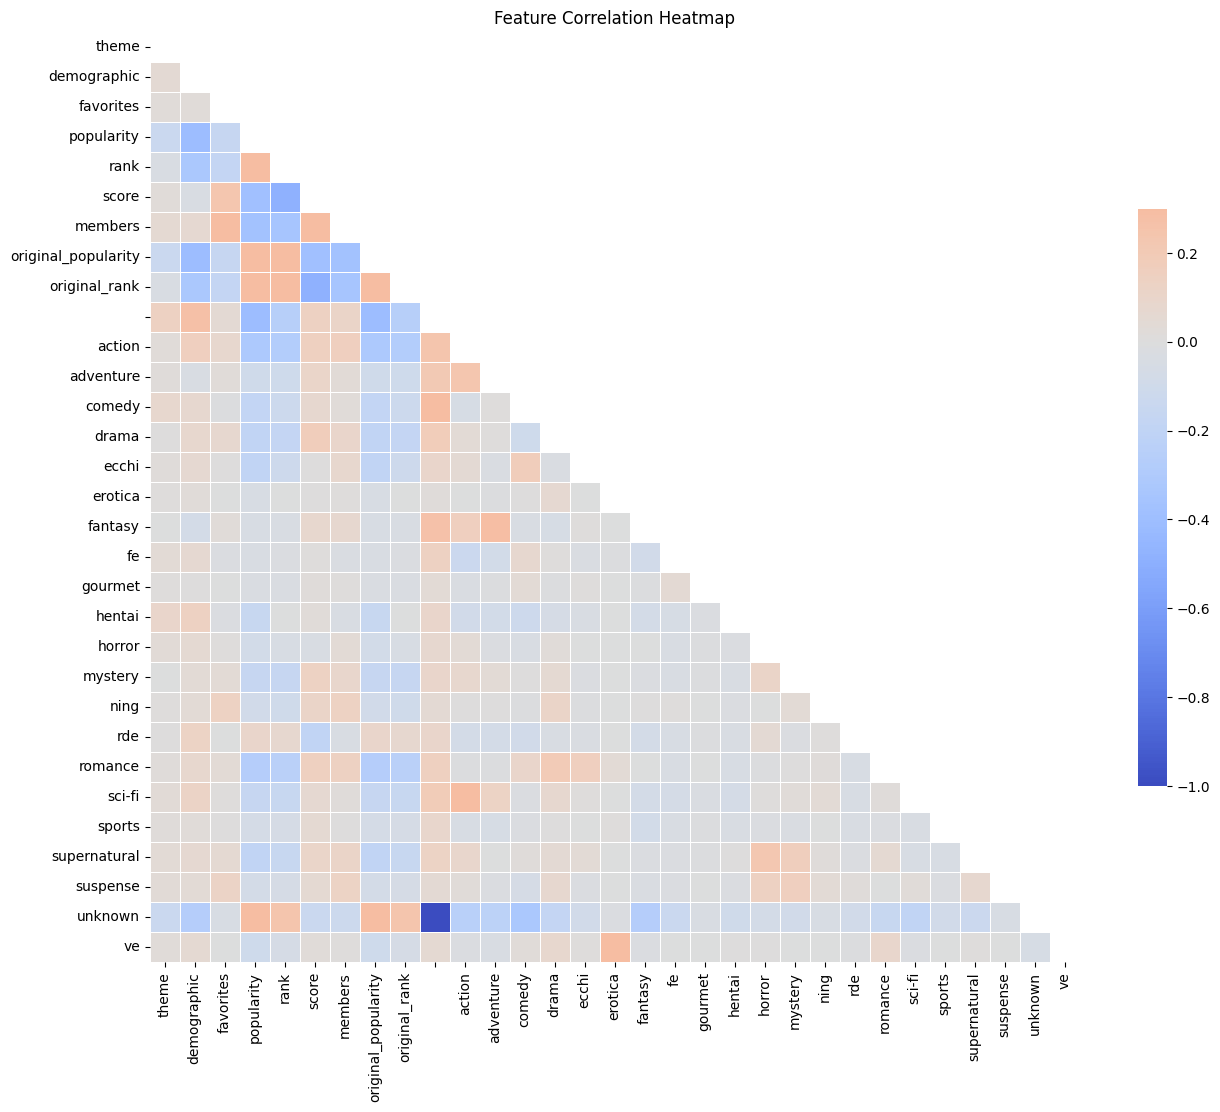

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr = df_encoded.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(15, 15))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.show()


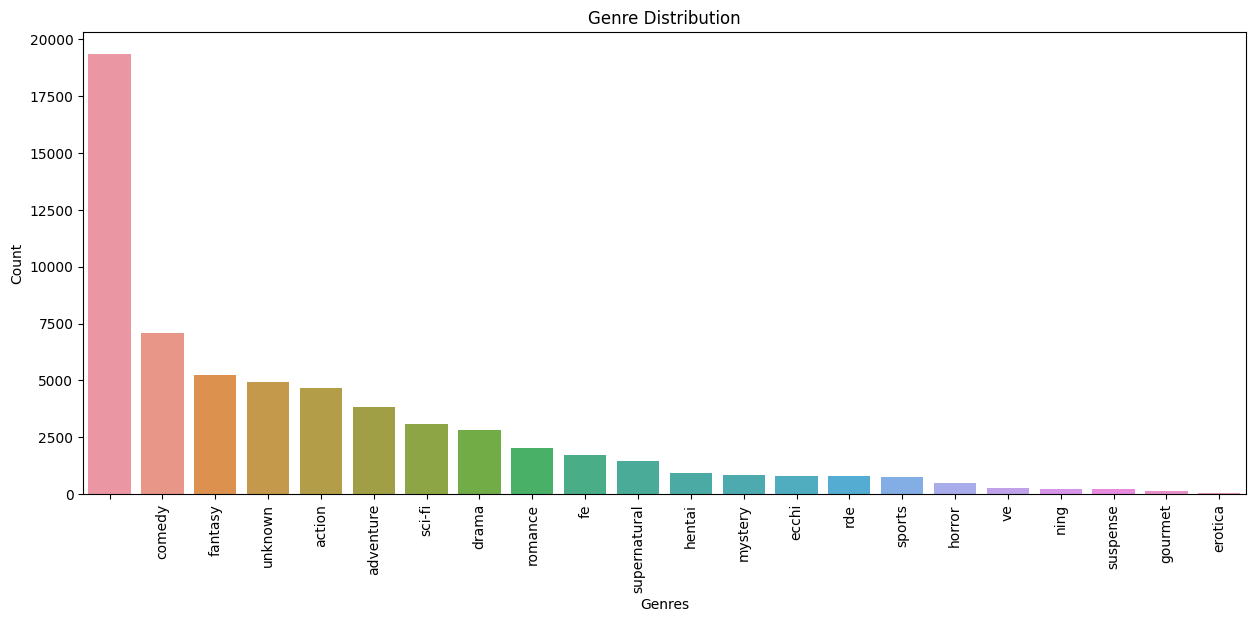

                19348
comedy           7104
fantasy          5250
unknown          4914
action           4685
adventure        3826
sci-fi           3068
drama            2806
romance          2024
fe               1727
supernatural     1472
hentai            923
mystery           838
ecchi             793
rde               792
sports            763
horror            506
ve                255
ning              240
suspense          238
gourmet           149
erotica            34
dtype: int64

In [ ]:
# Check the class distribution for stratified sampling
class_distribution = genres_df.sum(axis=0).sort_values(ascending=False)
# Plotting the class distribution
plt.figure(figsize=(15, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()
# Check if classes are imbalanced
class_distribution


In [ ]:
# Model Training and Evaluation

In [ ]:
## Random Split (80:20)
X_data = df_encoded[['theme', 'demographic', 'favorites', 'popularity', 'rank', 'score', 'members']]
y_data = genres_df
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

## Create Subsets for Quick Training
subset_ratio = 0.1
X_train_subset = X_train.sample(frac=subset_ratio, random_state=42)
y_train_subset = y_train.loc[X_train_subset.index]
X_test_subset = X_test.sample(frac=subset_ratio, random_state=42)
y_test_subset = y_test.loc[X_test_subset.index]

In [ ]:
# Splitting the dataset into training and test sets (80:20 ratio)using random sampling
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19409, 7), (4853, 7), (19409, 22), (4853, 22))

In [ ]:
## Initialize Classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

## Train and Evaluate
classification_reports = {}
for genre in genres_df.columns:
    y_train_genre = y_train_subset[genre]
    y_test_genre = y_test_subset[genre]
    reports = {}
    for name, clf in classifiers.items():
        clf.fit(X_train_subset, y_train_genre)
        y_pred = clf.predict(X_test_subset)
        reports[name] = classification_report(y_test_genre, y_pred, zero_division=1, output_dict=True)
    classification_reports[genre] = reports

In [ ]:
# Initialize an empty dictionary to store classification reports for each genre
classification_reports_all_genres = {}

# Initialize classifiers
classifiers_all_genres = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

In [ ]:
# Loop through each genre and train models
for genre in genres_df.columns:
    y_train_genre = y_train_subset[genre]
    y_test_genre = y_test_subset[genre]

    # Initialize an empty dictionary to store classification reports for each model
    classification_reports_each_genre = {}

    for name, clf in classifiers_all_genres.items():
        # Initialize Classifier Chain with the classifier
        clf_chain = ClassifierChain(clf)

        # Train the classifier chain on a single genre
        clf_chain.fit(X_train_subset, pd.DataFrame(y_train_genre))

        # Predict for the test set
        y_pred_genre = clf_chain.predict(X_test_subset)

        # Generate classification report and store it
        classification_reports_each_genre[name] = classification_report(y_test_genre, y_pred_genre, zero_division=1, output_dict=True)

    # Store the classification reports for each genre
    classification_reports_all_genres[genre] = classification_reports_each_genre


In [ ]:

# Extract the weighted average F1-scores for each model across genres
knn_f1_scores = [v['KNN']['weighted avg']['f1-score'] for v in classification_reports_all_genres.values()]
decision_tree_f1_scores = [v['Decision Tree']['weighted avg']['f1-score'] for v in classification_reports_all_genres.values()]
svm_f1_scores = [v['SVM']['weighted avg']['f1-score'] for v in classification_reports_all_genres.values()]

# Create an index for each tick position
ind = np.arange(len(classification_reports_all_genres))



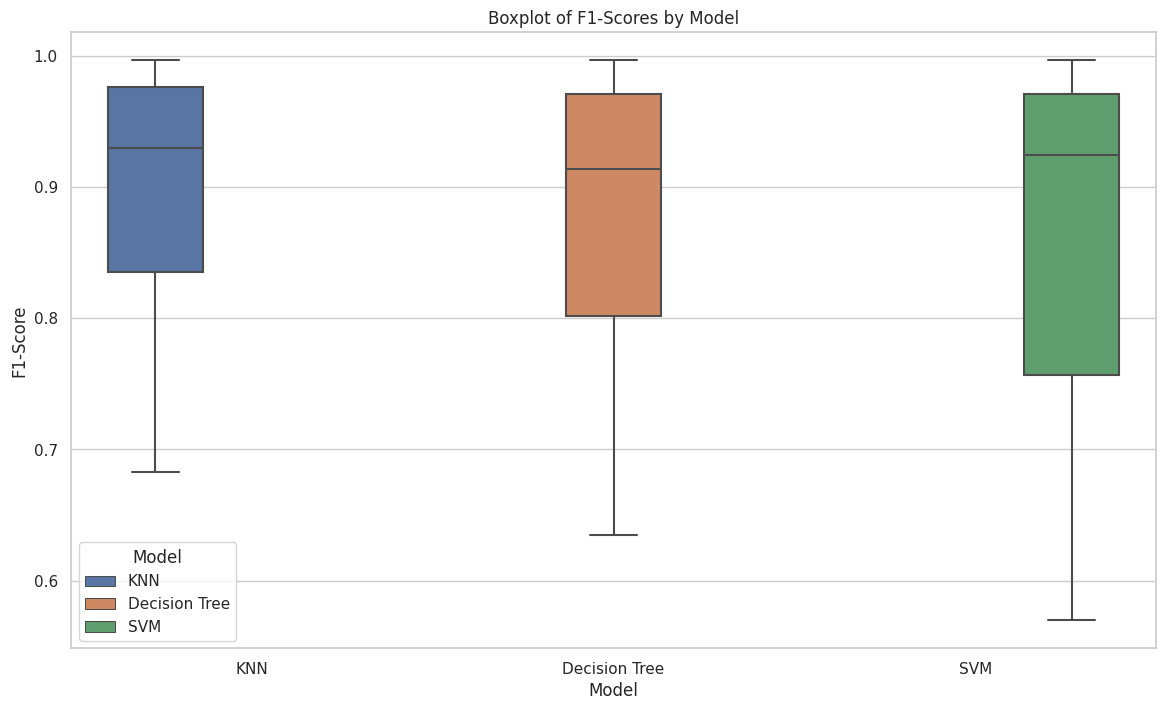

In [ ]:
# Prepare data for boxplot
boxplot_data = []
model_names = ['KNN', 'Decision Tree', 'SVM']
for genre, scores in classification_reports_all_genres.items():
    for model in model_names:
        f1_score_value = scores[model]['weighted avg']['f1-score']  # Extract F1-score
        boxplot_data.append({'Genre': genre, 'Model': model, 'F1-Score': f1_score_value})

# Create a DataFrame
boxplot_df = pd.DataFrame(boxplot_data)

# Generate the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='F1-Score', hue='Model', data=boxplot_df)
plt.title('Boxplot of F1-Scores by Model')
plt.show()


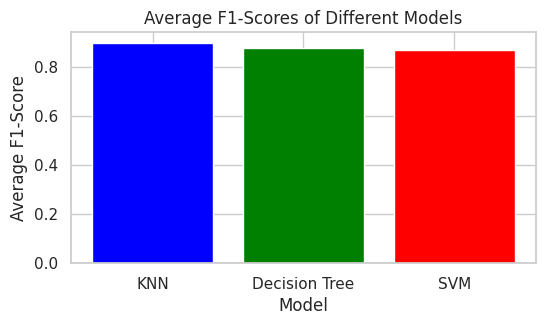

In [ ]:
# Calculate average F1-scores for each model
average_knn_f1 = np.mean(knn_f1_scores)
average_decision_tree_f1 = np.mean(decision_tree_f1_scores)
average_svm_f1 = np.mean(svm_f1_scores)

# Model names and their average F1-scores
models = ['KNN', 'Decision Tree', 'SVM']
average_f1_scores = [average_knn_f1, average_decision_tree_f1, average_svm_f1]

# Create a bar chart
plt.figure(figsize=(6, 3))
plt.bar(models, average_f1_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Average F1-Score')
plt.title('Average F1-Scores of Different Models')
plt.show()


In [ ]:
# Prepare data to display performance metrics for a specific genre
action_metrics_df = pd.DataFrame(classification_reports_all_genres['fantasy']).transpose()

action_metrics_df

,0,1,accuracy,macro avg,weighted avg
KNN,"{'precision': 0.7990314769975787, 'recall': 0....","{'precision': 0.3611111111111111, 'recall': 0....",0.734021,"{'precision': 0.5800712940543449, 'recall': 0....","{'precision': 0.7006122607468055, 'recall': 0...."
Decision Tree,"{'precision': 0.7969151670951157, 'recall': 0....","{'precision': 0.3125, 'recall': 0.275229357798...",0.701031,"{'precision': 0.5547075835475579, 'recall': 0....","{'precision': 0.6880466037685845, 'recall': 0...."
SVM,"{'precision': 0.7752577319587629, 'recall': 1....","{'precision': 1.0, 'recall': 0.0, 'f1-score': ...",0.775258,"{'precision': 0.8876288659793814, 'recall': 0....","{'precision': 0.8257668190030821, 'recall': 0...."


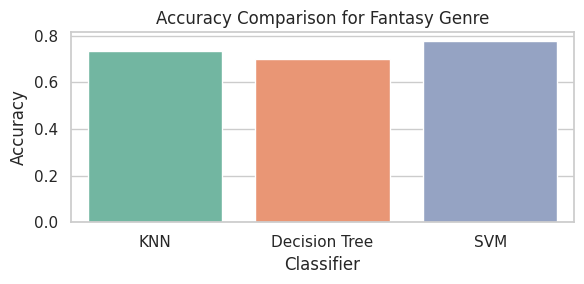

In [ ]:
selected_genre = 'fantasy'
classifiers = ['KNN', 'Decision Tree', 'SVM']
accuracy_values = {}

# Loop through classifiers to extract accuracy values for the selected genre
for clf in classifiers:
    accuracy_values[clf] = classification_reports_all_genres[selected_genre][clf]['accuracy']
# Convert accuracy values to a DataFrame for plotting
accuracy_df = pd.DataFrame(accuracy_values.values(), index=accuracy_values.keys(), columns=['Accuracy'])
# Create a bar plot to compare accuracies for the selected genre
plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
plot = sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df, palette="Set2")
plot.set_title(f"Accuracy Comparison for {selected_genre.capitalize()} Genre")
plot.set_xlabel("Classifier")
plot.set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data to display performance metrics for a specific genre
action_metrics_df = pd.DataFrame(classification_reports_all_genres['action']).transpose()

action_metrics_df

,0,1,accuracy,macro avg,weighted avg
KNN,"{'precision': 0.8634146341463415, 'recall': 0....","{'precision': 0.5066666666666667, 'recall': 0....",0.808247,"{'precision': 0.6850406504065041, 'recall': 0....","{'precision': 0.7942717291090436, 'recall': 0...."
Decision Tree,"{'precision': 0.8549618320610687, 'recall': 0....","{'precision': 0.40217391304347827, 'recall': 0...",0.769072,"{'precision': 0.6285678725522734, 'recall': 0....","{'precision': 0.7672049982720924, 'recall': 0...."
SVM,"{'precision': 0.8061855670103093, 'recall': 1....","{'precision': 1.0, 'recall': 0.0, 'f1-score': ...",0.806186,"{'precision': 0.9030927835051547, 'recall': 0....","{'precision': 0.8437496014454247, 'recall': 0...."


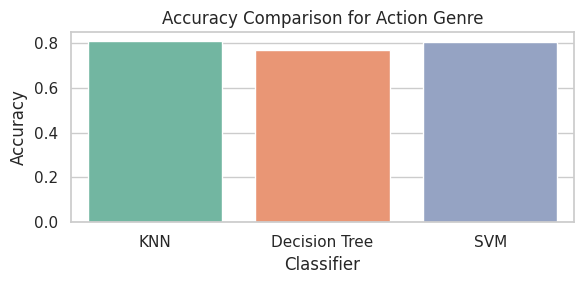

In [ ]:
selected_genre = 'action'
classifiers = ['KNN', 'Decision Tree', 'SVM']
accuracy_values = {}

# Loop through classifiers to extract accuracy values for the selected genre
for clf in classifiers:
    accuracy_values[clf] = classification_reports_all_genres[selected_genre][clf]['accuracy']
# Convert accuracy values to a DataFrame for plotting
accuracy_df = pd.DataFrame(accuracy_values.values(), index=accuracy_values.keys(), columns=['Accuracy'])
# Create a bar plot to compare accuracies for the selected genre
plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
plot = sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df, palette="Set2")
plot.set_title(f"Accuracy Comparison for {selected_genre.capitalize()} Genre")
plot.set_xlabel("Classifier")
plot.set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data to display performance metrics for a specific genre
action_metrics_df = pd.DataFrame(classification_reports_all_genres['comedy']).transpose()

action_metrics_df

,0,1,accuracy,macro avg,weighted avg
KNN,"{'precision': 0.7604456824512534, 'recall': 0....","{'precision': 0.49206349206349204, 'recall': 0...",0.690722,"{'precision': 0.6262545872573727, 'recall': 0....","{'precision': 0.6785476119824108, 'recall': 0...."
Decision Tree,"{'precision': 0.7438271604938271, 'recall': 0....","{'precision': 0.40372670807453415, 'recall': 0...",0.630928,"{'precision': 0.5737769342841806, 'recall': 0....","{'precision': 0.6400439296524758, 'recall': 0...."
SVM,"{'precision': 0.6948453608247422, 'recall': 1....","{'precision': 1.0, 'recall': 0.0, 'f1-score': ...",0.694845,"{'precision': 0.8474226804123711, 'recall': 0....","{'precision': 0.787964714634924, 'recall': 0.6..."


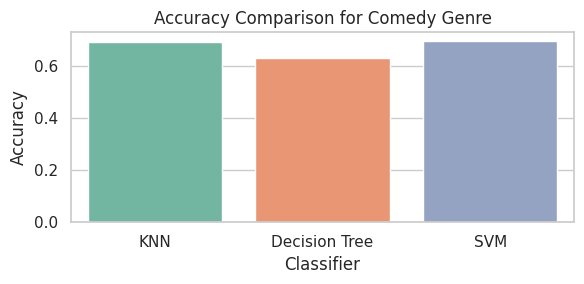

In [ ]:
selected_genre = 'comedy'
classifiers = ['KNN', 'Decision Tree', 'SVM']
accuracy_values = {}

# Loop through classifiers to extract accuracy values for the selected genre
for clf in classifiers:
    accuracy_values[clf] = classification_reports_all_genres[selected_genre][clf]['accuracy']
# Convert accuracy values to a DataFrame for plotting
accuracy_df = pd.DataFrame(accuracy_values.values(), index=accuracy_values.keys(), columns=['Accuracy'])
# Create a bar plot to compare accuracies for the selected genre
plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
plot = sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df, palette="Set2")
plot.set_title(f"Accuracy Comparison for {selected_genre.capitalize()} Genre")
plot.set_xlabel("Classifier")
plot.set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

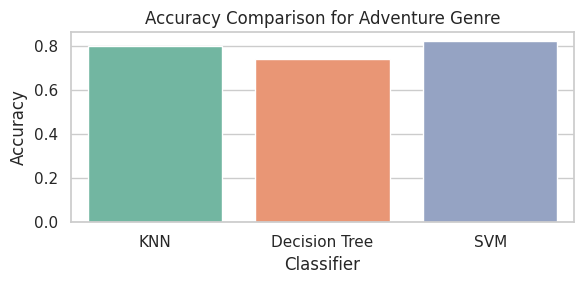

In [ ]:
selected_genre = 'adventure'
classifiers = ['KNN', 'Decision Tree', 'SVM']
accuracy_values = {}

# Loop through classifiers to extract accuracy values for the selected genre
for clf in classifiers:
    accuracy_values[clf] = classification_reports_all_genres[selected_genre][clf]['accuracy']
# Convert accuracy values to a DataFrame for plotting
accuracy_df = pd.DataFrame(accuracy_values.values(), index=accuracy_values.keys(), columns=['Accuracy'])
# Create a bar plot to compare accuracies for the selected genre
plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
plot = sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df, palette="Set2")
plot.set_title(f"Accuracy Comparison for {selected_genre.capitalize()} Genre")
plot.set_xlabel("Classifier")
plot.set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data to display performance metrics for a specific genre
action_metrics_df = pd.DataFrame(classification_reports_all_genres['drama']).transpose()

action_metrics_df

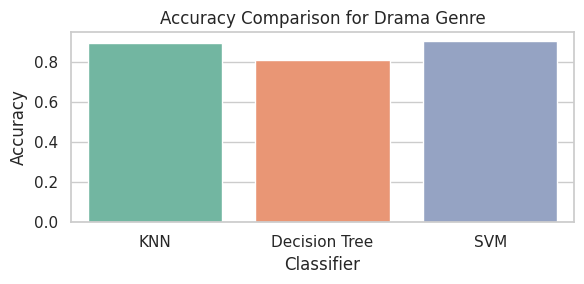

In [ ]:
selected_genre = 'drama'
classifiers = ['KNN', 'Decision Tree', 'SVM']
accuracy_values = {}

# Loop through classifiers to extract accuracy values for the selected genre
for clf in classifiers:
    accuracy_values[clf] = classification_reports_all_genres[selected_genre][clf]['accuracy']
# Convert accuracy values to a DataFrame for plotting
accuracy_df = pd.DataFrame(accuracy_values.values(), index=accuracy_values.keys(), columns=['Accuracy'])
# Create a bar plot to compare accuracies for the selected genre
plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
plot = sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df, palette="Set2")
plot.set_title(f"Accuracy Comparison for {selected_genre.capitalize()} Genre")
plot.set_xlabel("Classifier")
plot.set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data to display performance metrics for a specific genre
action_metrics_df = pd.DataFrame(classification_reports_all_genres['sports']).transpose()

action_metrics_df

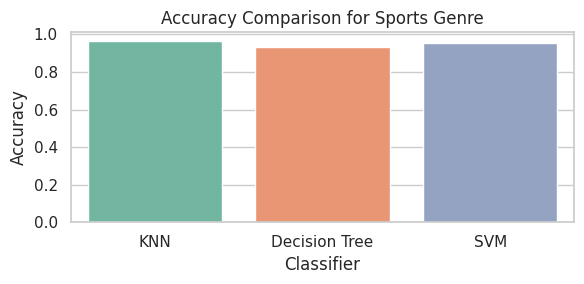

In [ ]:
selected_genre = 'sports'
classifiers = ['KNN', 'Decision Tree', 'SVM']
accuracy_values = {}

# Loop through classifiers to extract accuracy values for the selected genre
for clf in classifiers:
    accuracy_values[clf] = classification_reports_all_genres[selected_genre][clf]['accuracy']
# Convert accuracy values to a DataFrame for plotting
accuracy_df = pd.DataFrame(accuracy_values.values(), index=accuracy_values.keys(), columns=['Accuracy'])
# Create a bar plot to compare accuracies for the selected genre
plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
plot = sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df, palette="Set2")
plot.set_title(f"Accuracy Comparison for {selected_genre.capitalize()} Genre")
plot.set_xlabel("Classifier")
plot.set_ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
# Function to prepare the dataset
def prepare_dataset(df):
    num_cols = ['favorites', 'score', 'members']
    for col in num_cols:
        df[col] = df[col].astype(float)
    df['genres'] = df['genres']
    df['theme'] = label_encoder_theme.inverse_transform(df['theme'])
    df['demographic'] = label_encoder_demographic.inverse_transform(df['demographic'])
    return df

# Function to filter dataset based on user input and recommend 10 anime
def recommend_anime(df, input_genres, input_theme, input_demographic):
    filtered_df = df[df['genres'].apply(lambda x: all(genre in x for genre in input_genres))]
    filtered_df = filtered_df[filtered_df['theme'].str.contains(input_theme, case=False)]
    filtered_df = filtered_df[filtered_df['demographic'].str.contains(input_demographic, case=False)]
    recommended_anime = filtered_df.sort_values('score', ascending=False).head(10)
    return recommended_anime[['title', 'genres','original_popularity','original_rank','score', 'demographic', 'theme']]

# Prepare the dataset
anime_data_prepared = prepare_dataset(df.copy())

input_genres = input("Enter genre : ")
input_theme = input("Enter theme (options: Military, School, Super Power,Time Travel,Martial Arts, Detective,Psychological, Survival, Isekai,Samurai, Educational,etc): ")
input_demographic = input("Enter demographic (options: Shounen, Seinen, Shoujo, Josei, Kids): ")



recommendations = recommend_anime(anime_data_prepared, input_genres, input_theme, input_demographic)
print(recommendations)


Enter genre : Action
Enter theme (options: Military, School, Super Power,Time Travel,Martial Arts, Detective,Psychological, Survival, Isekai,Samurai, Educational,etc): Isekai
Enter demographic (options: Shounen, Seinen, Shoujo, Josei, Kids): Shounen
                                            title  \
1201   Naruto: Shippuuden Movie 6 - Road to Ninja   
2792                                          MÄR   
4037                       Elf wo Karu Mono-tachi   
19924                      Shounen Sunday CM: MÄR   

                                 genres  original_popularity  original_rank  \
1201          Action,Adventure,Fantasy,                660.0         1202.0   
2792   Action,Adventure,Comedy,Fantasy,               2903.0         2793.0   
4037    Adventure,Comedy,Fantasy,Ecchi,               4130.0         4039.0   
19924  Action,Adventure,Comedy,Fantasy,              18672.0        19925.0   

          score demographic   theme  
1201   1.728419     Shounen  Isekai  
2792   1.139